In [76]:
from preamble import *
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import random

In [77]:
!pip install watermark

In [78]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

sklearn   : 0.23.2
numpy     : 1.19.2
scipy     : 1.5.2
matplotlib: 3.3.2



In [79]:
import os 

data = pd.read_csv(
os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
      'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [9]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [82]:
data_dummies = pd.get_dummies(data)

In [81]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수:{:.2f}".format(logreg.score(X_test,y_test)))

테스트 점수:0.81


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1], '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [85]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [86]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)

In [87]:
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [88]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
[("scaling", StandardScaler(), ['age', 'hours-per-week']),
("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [91]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.809237


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [93]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
(StandardScaler(), ['age', 'hours-per-week']),
(OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

In [94]:
ct= ColumnTransformer(
[("scaling", StandardScaler(), ['age', 'hours-per-week']),
("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [95]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

score: 0.63
score: 0.86


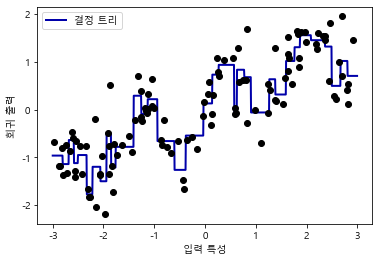

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dreg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, dreg.predict(line), label="결정 트리")

lreg = LinearRegression().fit(X, y)
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
print("score: {:.2f}".format(lreg.score(X, y)))
print("score: {:.2f}".format(dreg.score(X, y)))

In [97]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy = 'uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

'위에 부분에서 코드르 돌릴 때  'numpy.ndarray' object has no attribute 'toarray'이런 오류가 뜨는데 왜 array로 바뀌어서 출력되는지 이해를 할 수 없었다.

Linear Regression score: 0.72
DecisionTreeRegressor score: 0.72


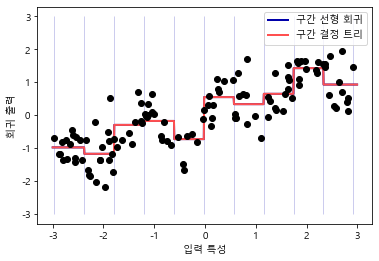

In [98]:
line_binned = kb.transform(line)

lreg = LinearRegression().fit(X_binned, y)
plt.plot(line, lreg.predict(line_binned), label='구간 선형 회귀')

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dreg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

print("Linear Regression score: {:.2f}".format(lreg.score(X_binned, y)))
print("DecisionTreeRegressor score: {:.2f}".format(dreg.score(X_binned, y)))

In [99]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

(120, 11)
[[-0.753  0.     0.     0.     1.     0.     0.     0.     0.     0.
   0.   ]
 [ 2.704  0.     0.     0.     0.     0.     0.     0.     0.     0.
   1.   ]
 [ 1.392  0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.   ]
 [ 0.592  0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.   ]
 [-2.064  0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.   ]]


In [56]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)
print(X_product[:5])

(120, 20)
[[ 0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
  -0.    -0.    -0.    -0.753 -0.    -0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     2.704]
 [ 0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     1.392  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.592  0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
  -0.    -2.064 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.   ]]


In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 10, include_bias=False) #x **10
poly.fit(X)
X_poly = poly.transform(X)

In [101]:
rnd = np.random.RandomState(0)

In [102]:
X_org = rnd.normal(size=(1000, 3)) 
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [106]:
from sklearn.linear_model import Ridge
score = Ridge().fit(X_train, y_train).score(X_test, y_test)

ValueError: could not convert string to float: ' Private'

In [72]:
from sklearn.feature_selection import SelectPercentile, f_classif
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)

NameError: name 'rng' is not defined

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train) 

ValueError: could not convert string to float: ' Private'

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()


ValueError: could not convert string to float: ' Private'

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
scores = cross_val_score(logreg, iris.data, iris.target,cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

교차 검증 점수:
[0. 0. 0.]


In [121]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수:", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

교차 검증 분할 횟수: 150
평균 정확도: 0.97


In [127]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.96  0.987 0.92  0.947 0.96  0.88  0.947 0.933 0.96  0.96 ]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.96  0.987 0.92  0.947 0.96  0.88  0.947 0.933 0.96  0.96 ]


In [131]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.75  0.6   0.667]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [133]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)

In [134]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 1000]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

NameError: name 'best_parameters' is not defined

In [140]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))
print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))

테스트 세트 점수: 0.97
최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
최고 성능 모델:
SVC(C=10, gamma=0.1)


In [142]:
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))


,0,1,2,3,4
mean_fit_time,0.0006,0.0008,0.0006,0.00059,0.0008
std_fit_time,0.00049,0.0004,0.00049,0.00048,0.0004
mean_score_time,0.0004,0.0004,0.0002,0.00061,0
std_score_time,0.00049,0.00049,0.0004,0.00049,0
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


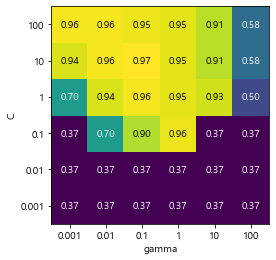

In [143]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [145]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))


그리드 목록:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [146]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [148]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 빈도 높은 값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 빈도 높은 값: [False]
테스트 점수: 0.90


In [152]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

테스트 점수: 0.92
dummy 점수: 0.82


C:\Users\pc\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [153]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

logreg 점수: 0.98


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))


오차 행렬:
[[402   1]
 [  6  41]]


In [156]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.07
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



코드를 돌리다보니 "could not convert string to float: ' Private'" 이런 오류가 뜨는 부분을 고치는 법은 아직 잘 모르겠다 하지만 그 외의 방법에 대해서는 데이터 처리방식이나 평가지표를 만드는 방법에 대해서 알게 되었다.